In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-20,332.690002,333.100006,325.040009,328.980011,328.980011,5953800
1,2017-12-21,329.589996,333.739990,327.209991,331.660004,331.660004,4385200
2,2017-12-22,329.510010,330.920013,324.820007,325.200012,325.200012,4215800
3,2017-12-26,323.829987,323.940002,316.579987,317.290009,317.290009,4378400
4,2017-12-27,316.000000,317.679993,310.750000,311.640015,311.640015,4712100


In [3]:
signal = np.copy(tesla.Close.values)

In [8]:
def removal(signal, repeat):
    copy_signal = np.copy(signal)
    for j in range(repeat):
        for i in range(3, len(signal)):
            copy_signal[i - 1] = (copy_signal[i - 2] + copy_signal[i]) / 2
    return copy_signal

In [5]:
def get(original_signal, removed_signal):
    buffer = []
    for i in range(len(removed_signal)):
        buffer.append(original_signal[i] - removed_signal[i])
    return np.array(buffer)

In [9]:
removed_signal = removal(signal, 30)
noise = get(signal, removed_signal)

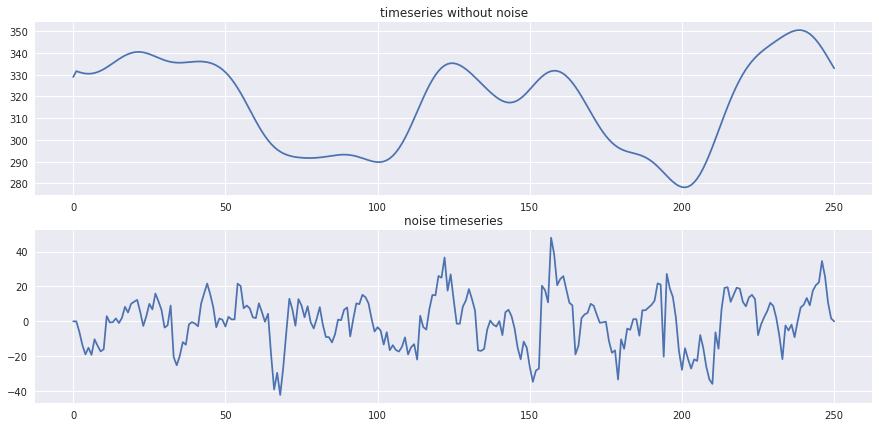

In [10]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.plot(removed_signal)
plt.title('timeseries without noise')
plt.subplot(2, 1, 2)
plt.plot(noise)
plt.title('noise timeseries')
plt.show()